In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os
#import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:

df1 = pd.read_csv('CATrecon.csv')
df2 = pd.read_csv('CATlabels.csv')

X = df1.values
y = df2.values

n = 899707
display(df1)
display(df2)

X = np.reshape(X, (n,13,21,1))

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
899703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
899704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
899705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,cotAlpha,cotBeta
0,308.048248,-2.456686,0.0,-0.988944,-0.016691,0.147350,59937,-6.711530,-0.113275
1,269.400848,-17.547522,0.0,-0.979427,0.002897,0.201779,39834,-4.853959,0.014357
2,-114.661781,-10.762573,0.0,0.920735,0.021547,0.389593,28121,2.363325,0.055306
3,373.618835,-14.498341,0.0,-0.985751,0.034938,0.164541,44496,-5.990914,0.212336
4,70.942093,16.567095,0.0,-0.628712,-0.073535,0.774153,10819,-0.812129,-0.094988
...,...,...,...,...,...,...,...,...,...
899702,273.131226,-18.831367,0.0,-0.984207,0.026848,0.174973,55470,-5.624908,0.153441
899703,100.958321,6.795188,0.0,-0.921760,0.075785,0.380283,18110,-2.423879,0.199286
899704,-149.783035,-10.000488,0.0,0.961390,0.033099,0.273190,29604,3.519126,0.121157
899705,-386.694794,-9.129040,0.0,0.990921,-0.024137,0.132262,62540,7.492107,-0.182494


In [3]:
path = os.getcwd()
print(path)
os.mkdir('CATcotAlpha')
os.chdir('CATcotAlpha')
print(os.getcwd())

/home/nqx/Abisko/SmartPixelUpdates/CATcotAlphaDeep


FileExistsError: [Errno 17] File exists: 'CATcotAlpha'

In [4]:
#note: labels.csv has 11 columns; you need to drop the column you don't want, and then adjust number of outputs in your NN

#df2.head()
df2.drop('x-entry', axis=1, inplace=True)
df2.drop('y-entry', axis=1, inplace=True)
df2.drop('z-entry', axis=1, inplace=True)
df2.drop('n_x', axis=1, inplace=True)
df2.drop('n_y', axis=1, inplace=True)
df2.drop('n_z', axis=1, inplace=True)
df2.drop('number_eh_pairs', axis=1, inplace=True)
df2.drop('cotBeta', axis=1, inplace=True)

print(df2.head())
#df2.shape

#reset y since you dropped columns
y = df2.values

   cotAlpha
0 -6.711530
1 -4.853959
2  2.363325
3 -5.990914
4 -0.812129


/home/nqx/spack/var/spack/environments/rocm/.spack-env/._view/imgapaatxz7hyp2qkoilbz5lvysa4ryk/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


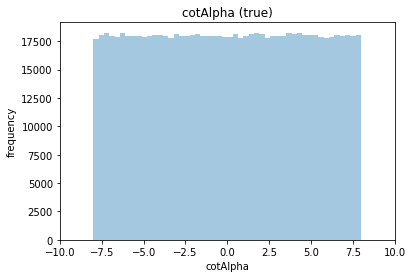

In [5]:
#histo. of true cotAlpha values
df_true_cotAlpha = pd.DataFrame(df2, columns=['cotAlpha'])
sns.distplot(df_true_cotAlpha['cotAlpha'], kde=False, bins=50)
plt.xlabel('cotAlpha')
plt.xlim([-10,10])
plt.ylabel('frequency')
plt.title("cotAlpha (true)")
plt.savefig('cotAlpha-true.png')

/home/nqx/spack/var/spack/environments/rocm/.spack-env/._view/imgapaatxz7hyp2qkoilbz5lvysa4ryk/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nqx/spack/var/spack/environments/rocm/.spack-env/._view/imgapaatxz7hyp2qkoilbz5lvysa4ryk/lib/python3.9/site-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/nqx/spack/var/spack/environments/rocm/.spack-env/._view/imgapaatxz7hyp2qkoilbz5lvysa4ryk/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


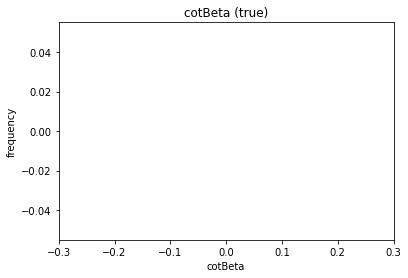

In [6]:
df_true_cotBeta = pd.DataFrame(df2, columns=['cotBeta'])
sns.distplot(df_true_cotBeta['cotBeta'], kde=False, bins=20)
plt.xlim([-0.3,0.3])
plt.xlabel('cotBeta')
plt.ylabel('frequency')
plt.title("cotBeta (true)")
plt.savefig('cotBeta-true.png')

In [7]:
#https://keras.io/api/callbacks/#csvlogger
#from https://keras.io/guides/writing_your_own_callbacks/
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))

    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print("Start epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start testing; got log keys: {}".format(keys))

    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop testing; got log keys: {}".format(keys))

    def on_predict_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start predicting; got log keys: {}".format(keys))

    def on_predict_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop predicting; got log keys: {}".format(keys))

    def on_train_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: start of batch {}; got log keys: {}".format(batch, keys))

    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: end of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: start of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: end of batch {}; got log keys: {}".format(batch, keys))

   # def on_predict_batch_begin(self, batch, logs=None):
    #    keys = list(logs.keys())
     #   print("...Predicting: start of batch {}; got log keys: {}".format(batch, keys))

#    def on_predict_batch_end(self, batch, logs=None):
 #       keys = list(logs.keys())
  #      print("...Predicting: end of batch {}; got log keys: {}".format(batch, keys))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#scale input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

#make a simple model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', input_shape=(13, 21, 1)))
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(1, activation='linear'))
model.summary()


(899707, 13, 21, 1) (899707, 1)
(719765, 13, 21, 1) (179942, 13, 21, 1) (719765, 1) (179942, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 19, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 17, 32)         4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 15, 64)         18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 7, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1344)              0         
                                                                 
 dense (Dense)            

2022-05-23 13:23:17.805597: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/rocm/rocblas/lib64:/opt/rocm/rocblas/lib:/opt/rocm/hipblas/lib64:/opt/rocm/hipblas/lib:/opt/rocm/lib:/opt/rocm/lib64:/lib:/home/nqx/packages/hpc_sdk/Linux_x86_64/22.3/cuda/11.6/lib64:/home/nqx/packages/hpc_sdk/Linux_x86_64/22.3/cuda/11.6/cuda/lib64/:/home/nqx/packages/hpc_sdk/Linux_x86_64/22.3/math_libs/11.6/targets/x86_64-linux/lib:/home/nqx/packages/OpenBLAS/install/lib:/home/nqx/packages/OpenBLAS/install/lib64:.:/home/nqx/packages/CLBlast/install/lib:/home/nqx/packages/CLBlast/install/lib64:.:/home/nqx/spack/var/spack/environments/rocm/.spack-env/view/lib64:/home/nqx/spack/var/spack/environments/rocm/.spack-env/view/lib
2022-05-23 13:23:17.805642: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Pleas

In [10]:
checkpoint_path = "cp.ckpt"

# Create a callback that saves the model's weights 
# currently, model weights are saved for each training
# to do - update for early stopping
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
#patience: Number of epochs with no improvement after which training will be stopped
earlyStop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

csv_logger = CSVLogger('log.csv', append=True, separator=';')

batch_size = 64
epochs = 100 
     
model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer='adam',
              metrics=['mean_squared_error'])

history = model.fit(
          X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,  
          verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[cp_callback, csv_logger, earlyStop_callback],
          )
              
res = model.evaluate(
    X_test, y_test, batch_size=batch_size,              
) 
  
predictions = model.predict(X_test, batch_size=batch_size, callbacks=[CustomCallback()])

Epoch 1/100
11246/11247 [============================>.] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 1: saving model to cp.ckpt
11247/11247 [==============================] - 94s 8ms/step - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 2/100
11238/11247 [============================>.] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 2: saving model to cp.ckpt
11247/11247 [==============================] - 81s 7ms/step - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 3/100
11241/11247 [============================>.] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 3: saving model to cp.ckpt
11247/11247 [==============================] - 78s 7ms/step - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 4/100
11247/11247 [==============================] - ETA: 0s - loss: 0.0547 - mean_squared_err

In [11]:
#save model                                        
# serialize model to JSON                                                                                                          
                           
model_json = model.to_json()                                                                                    
with open("model.json", "w") as json_file:                                                  
  json_file.write(model_json)                                              
                           
                                                                                                                               
#save full model in hd5 format                                           
model.save('my_model.h5')

#alt. methods
#You can save History attribute of tf.keras.callbacks.History in .txt form
#with open("/content/drive/MyDrive/NN-jan28/result_model.txt",'w') a   s f:
#    for k in history.history.keys():
#        print(k,file=f)
#        for i in history.history[k]:
#            print(i,file=f)
#import pickle
#with open('/content/drive/MyDrive/NN-jan28/trainHistoryDict', 'wb') as file_pi:
#    pickle.dump(history.history, file_pi)

In [12]:
print(len(predictions))
#df_predict = pd.DataFrame(predictions, columns=['cotAlpha', 'cotBeta'])
df_predict = pd.DataFrame(predictions, columns=['cotAlpha'])
print(df_predict)
df_predict.head()


179942
        cotAlpha
0       0.384542
1       4.914687
2       4.178226
3       1.497126
4      -2.050938
...          ...
179937  7.795010
179938  1.013073
179939 -7.816917
179940 -0.461385
179941  4.678710

[179942 rows x 1 columns]


,cotAlpha
0,0.384542
1,4.914687
2,4.178226
3,1.497126
4,-2.050938


In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)
#print(X.shape, y.shape)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#df_predict = pd.DataFrame(predictions, columns=['x_entry', 'y_entry', 'z_entry', 'cotAlpha', 'cotBeta'])
print(y_test.shape)
#trueLabels = pd.DataFrame(y_test, columns=['cotAlpha', 'cotBeta'])
trueLabels = pd.DataFrame(y_test, columns=['cotAlpha'])


(179942, 1)


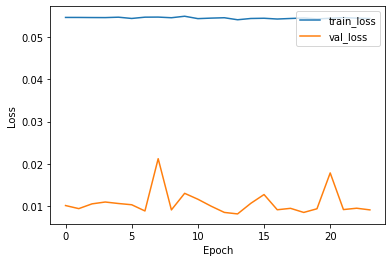

In [14]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('loss.png')


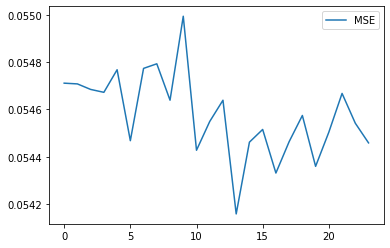

In [15]:
plt.plot(history.history['mean_squared_error'], label='MSE')
plt.legend(loc='upper right')
plt.savefig('mse.png')

In [ ]:
df_predict.to_csv('predictions.csv')

In [ ]:
trueLabels.to_csv('trueLabels.csv')